In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]]. values 

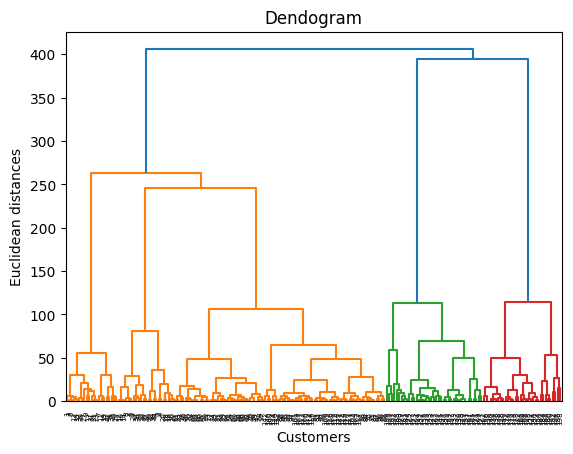

In [6]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X, method='ward')) # here elbow method wont work so using dendrogram
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()
#totally 5 clusters it takes oly big ones as smaller ones will not give accurate results

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
clusmodel=AgglomerativeClustering(n_clusters=5)
label=clusmodel.fit_predict(X)

In [9]:
supervised=pd.DataFrame(dataset)

In [10]:
supervised['Cluster_group']=label

In [11]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [12]:
import seaborn as sns

C:\Anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


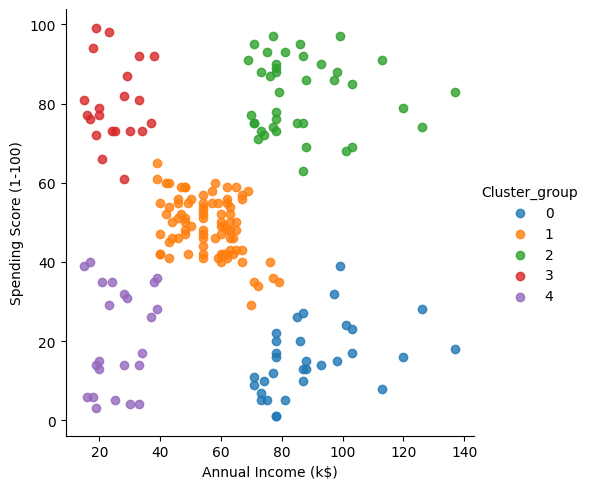

In [13]:
facet=sns.lmplot(data=supervised, x=supervised.columns[3],
                 y=supervised.columns[4], 
                 hue=supervised.columns[5], 
                 fit_reg=False,
                 legend = True,
                 legend_out=True)